# import data

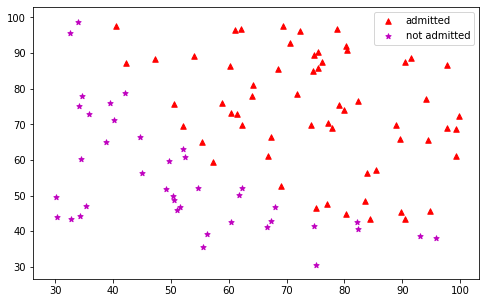

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
data=pd.read_csv('ex2data1.txt',names=['score1','score2','admission'])
data.insert(0,'ones',1)
pos=data[data['admission']==1]
neg=data[data['admission']==0]
fig,axs=plt.subplots(figsize=(8,5))
axs.scatter(pos['score1'],pos['score2'],s=30,c='r',marker='^',label='admitted')
axs.scatter(neg['score1'],neg['score2'],s=30,c='m',marker='*',label='not admitted')
plt.legend()
plt.show()
X=data.iloc[:,:3]
y=data.iloc[:,3:]
X=np.matrix(X)
y=np.matrix(y)

In [27]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

# Computing Cost

In [28]:
def cal_cost(X,y,features):
    h=sigmoid(X*features.T)
    m=len(X)
    return np.sum((-(np.multiply(y,np.log(h)))-np.multiply((1-y),np.log(1-h))))/m

In [29]:
features=np.matrix(np.array([0,0,0]))
cost=cal_cost(X,y,features)
print(cost)
print(X.shape,features.T.shape,y.shape)

0.6931471805599453
(100, 3) (3, 1) (100, 1)


# Gradient Descent

In [30]:
def Gradient_descent(X,y,features,alpha,iters):
    temp=np.matrix(np.zeros(features.shape))
    m=len(X)
    para=int(features.ravel().shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=sigmoid(X*features.T)-y
        for j in range(para):
            temp1=np.multiply(error,X[:,j])
            temp[0,j]=features[0,j]-(alpha/m)*np.sum(temp1)
        features=temp
        cost[i]=cal_cost(X,y,features)
    return features,cost

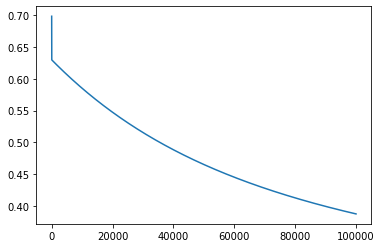

[[-4.81180027  0.04528064  0.03819149]]
0.38738952271118804


In [31]:
a=np.arange(100000)
final_features,final_cost=Gradient_descent(X,y,features,0.001,100000)
plt.plot(a,final_cost)
plt.show()
print(final_features)
print(final_cost[-1])

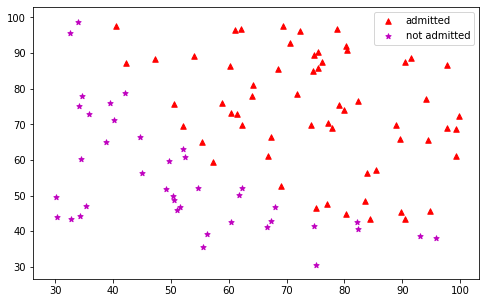

In [32]:
fig,axs=plt.subplots(figsize=(8,5))
axs.scatter(pos['score1'],pos['score2'],s=30,c='r',marker='^',label='admitted')
axs.scatter(neg['score1'],neg['score2'],s=30,c='m',marker='*',label='not admitted')
plt.legend()
#plt.plot(X*final_features.T,y)
plt.show()

In [33]:
def predicted(X,features):
    prob=sigmoid(X*final_features.T)
    return ([1 if temp>=0.5 else 0 for temp in prob])

def predicted1(X,features):
    return (sigmoid(X*final_features.T))


h=predicted1(X,final_features)

y_predicted=predicted(X,final_features)
corr=[1 if (p==1 and q==1) or (p==0 and q==0) else 0 for (p,q) in zip(y_predicted,y)]
accuracy=(sum(map(int,corr))%len(corr))
print(accuracy)

91
